### Part 3 will look to answering the following questions: 
 
 Q5. Electricity production from renewable sources over time in the US. 
 
 Q6. Effect of US electricity production from renewable sources on the US dollar (index). 
 

In [259]:
import os 
import csv 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import datetime as dt

In [260]:
#pulling in transformed files 

#renewable production vs. oil production over time 
data_filepath = "Transformed Data\Part 3.csv"
data = pd.read_csv(data_filepath)

data.head()

,Date,USD Index,Wood (mil kWh),Waste (mil kWh),Geothermal (mil kWh),Solar (mil kWh),Wind (mil kWh),Total Renewable (mil kWh),Coal (mil kWh),Petroleum (mil kWh),Natural_Gas (mil kWh),Other_Gas (mil kWh),Conventional Hydroelectric Power (mil kWh),Total Oil (mil kWh)
0,2005-01-01,95.450,3333.076,1278.347,1252.144,8.668,1131.569,7003.804,177013.907,12190.178,51337.627,1126.191,24272.165,265940.068
1,2005-02-01,95.698,3055.295,1123.407,1063.014,13.082,966.482,6221.280,155818.014,7314.510,44912.617,1076.051,21606.774,230727.966
2,2005-03-01,95.307,3287.717,1277.929,1204.252,38.157,1560.626,7368.681,163612.700,8351.900,51896.973,1214.487,22936.068,248012.128
3,2005-04-01,96.234,3035.547,1222.542,1187.134,58.263,1697.504,7200.990,143083.239,6952.153,52016.286,1121.459,23058.359,226231.496
4,2005-05-01,96.470,3100.697,1351.152,1264.308,81.153,1746.430,7543.740,153957.962,6713.918,54826.004,1191.303,27278.511,243967.698


## Q5. Electricity production from renewable sources over time in the US.

analyzing electricity production over 2005 to 2019, looking at the contribution of the different sources. 

### Looking at electricity production from renewable sources

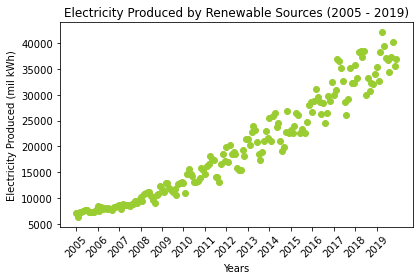

In [261]:
# major ticks for x-axis (by year)
years = np.arange(2005, 2020, 1)
ticks = np.arange(0, len(data["Date"]), 12)

plt.scatter(data["Date"], data["Total Renewable (mil kWh)"], color="yellowgreen")
plt.ylabel("Electricity Produced (mil kWh)")
plt.xlabel("Years")
plt.xticks(ticks, years, rotation=45)
plt.title("Electricity Produced by Renewable Sources (2005 - 2019)")
plt.tight_layout()

plt.savefig("Plots\Question 5 - Time vs. Renewable.png")


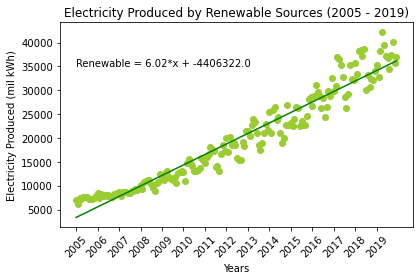

In [262]:
# regression analysis
data["Date_ordinal"] = pd.to_datetime(data["Date"]).apply(lambda date: date.toordinal())

r_slope, r_intercept, r_rvalue, r_pvalue, r_stderr = stats.linregress(data["Date_ordinal"], data["Total Renewable (mil kWh)"])
regressed_renewable = data["Date_ordinal"] * r_slope + r_intercept 

plt.annotate(f"Renewable = {round(r_slope,2)}*x + {round(r_intercept,0)}", (0,35000))
plt.scatter(data["Date"], data["Total Renewable (mil kWh)"], color="yellowgreen")
plt.plot(data["Date"], regressed_renewable, color="green")
plt.ylabel("Electricity Produced (mil kWh)")
plt.xlabel("Years")
plt.xticks(ticks, years, rotation=45)
plt.title("Electricity Produced by Renewable Sources (2005 - 2019)")

plt.tight_layout()

plt.savefig("Plots\Question 5 - Time vs. Renewable (with Regression).png")


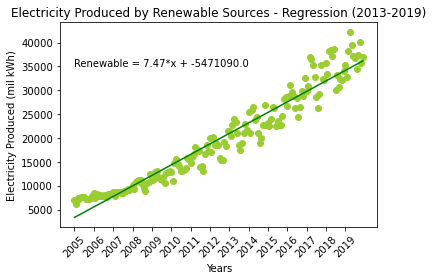

In [263]:
# regression analysis accounting from 2013 to 2019
renewable_oil["Date_ordinal"] = pd.to_datetime(renewable_oil["Date"]).apply(lambda date: date.toordinal())

r2_slope, r2_intercept, r2_rvalue, r2_pvalue, r2_stderr = stats.linregress(renewable_oil["Date_ordinal"][-84:], renewable_oil["Total Renewable (mil kWh)"][-84:])
regressed_renewable = renewable_oil["Date_ordinal"] * r_slope + r_intercept 

plt.scatter(renewable_data["Date"], renewable_data["Total Renewable (mil kWh)"], color="yellowgreen")
plt.plot(renewable_data["Date"], regressed_renewable, color="green")

plt.annotate(f"Renewable = {round(r2_slope,2)}*x + {round(r2_intercept,0)}", (0,35000))
plt.ylabel("Electricity Produced (mil kWh)")
plt.xlabel("Years")
plt.xticks(ticks, years, rotation=45)
plt.title("Electricity Produced by Renewable Sources - Regression (2013-2019)")

plt.tight_layout()

plt.savefig("Plots\Question 5 - Time vs. Renewable (with Regression - 2013 to 2019).png")

### Comparing oil production and renewable source production of electricity

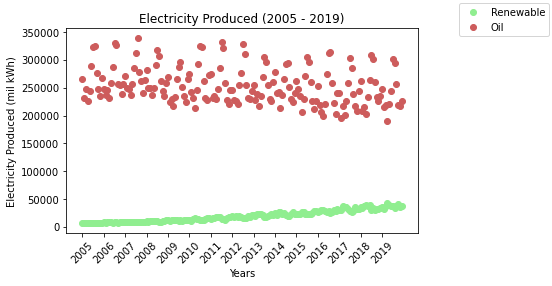

In [266]:
# major ticks for x-axis (by year)
years = np.arange(2005, 2020, 1)
ticks = np.arange(0, len(data["Date"]), 12)

fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(data["Date"], data["Total Renewable (mil kWh)"], c="lightgreen", label="Renewable")
ax1.scatter(data["Date"], data["Total Oil (mil kWh)"], c="indianred", label="Oil")
fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Electricity Produced (mil kWh)")
plt.xlabel("Years")
plt.xticks(ticks, years, rotation=45)
plt.title("Electricity Produced (2005 - 2019)")
plt.tight_layout()

plt.savefig("Plots\Question 5 - time vs. Oil and Renewable.png", bbox_inches='tight')



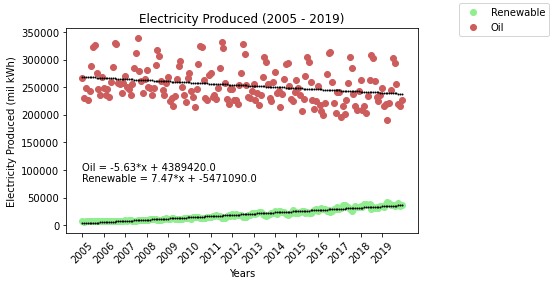

In [265]:
#Regression Analysis 

o_slope, o_intercept, o_rvalue, o_pvalue, o_stderr = stats.linregress(data["Date_ordinal"], data["Total Oil (mil kWh)"])
regressed_oil = data["Date_ordinal"] * o_slope + o_intercept 

fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(data["Date"], data["Total Renewable (mil kWh)"], c="lightgreen", label="Renewable")
ax1.scatter(data["Date"], data["Total Oil (mil kWh)"], c="indianred", label="Oil")
ax1.scatter(data["Date"], regressed_oil, c="black", s=1)
ax1.scatter(data["Date"], regressed_renewable, c="black", s=1)

plt.annotate(f"Renewable = {round(r2_slope,2)}*x + {round(r2_intercept,0)}", (0,80000))
plt.annotate(f"Oil = {round(o_slope,2)}*x + {round(o_intercept,0)}", (0,100000))
fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Electricity Produced (mil kWh)")
plt.xlabel("Years")
plt.xticks(ticks, years, rotation=45)
plt.title("Electricity Produced (2005 - 2019)")

plt.tight_layout()

plt.savefig("Plots\Question 5 - Time vs. Oil and Renewable (with Regression).png", bbox_inches='tight')


In [267]:
#intercept of when renewable production = oil production 

#regressed_oil = renewable_oil["Date_ordinal"] * o_slope + o_intercept 
#regressed_renewable = renewable_oil["Date_ordinal"] * r_slope + r_intercept 

intercept = (o_intercept-r2_intercept)/(r2_slope-o_slope)

dt.date.fromordinal(int(intercept))

#If the trend from 2013 onwards is maintained, it is predicted that electricity from renewable sources will surpass oil sources in 2016. 

datetime.date(2061, 9, 19)

### Analysis on types of renewable sources

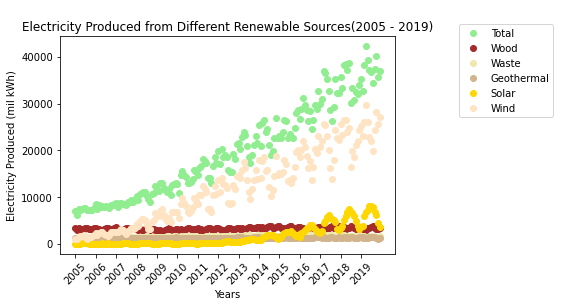

In [268]:
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(data["Date"], data["Total Renewable (mil kWh)"], c="lightgreen", label="Total")
ax1.scatter(data["Date"], data["Wood (mil kWh)"], c="brown", label="Wood")
ax1.scatter(data["Date"], data["Waste (mil kWh)"], c="palegoldenrod", label="Waste")
ax1.scatter(data["Date"], data["Geothermal (mil kWh)"], c="tan", label="Geothermal")
ax1.scatter(data["Date"], data["Solar (mil kWh)"], c="gold", label="Solar")
ax1.scatter(data["Date"], data["Wind (mil kWh)"], c="bisque", label="Wind")

fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Electricity Produced (mil kWh)")
plt.xlabel("Years")
plt.xticks(ticks, years, rotation=45)
plt.title("Electricity Produced from Different Renewable Sources(2005 - 2019)")

plt.savefig("Plots\Question 5 - Time vs. Types of Renewable Sources.png", bbox_inches='tight')

### Analysis on types of oil sources

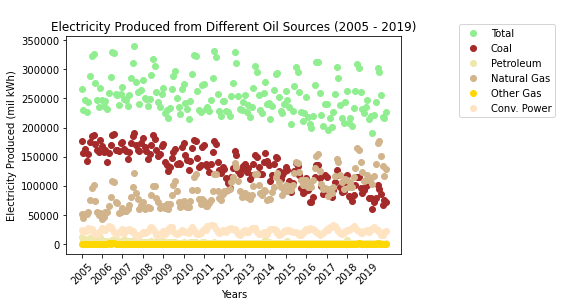

In [269]:
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(data["Date"], data["Total Oil (mil kWh)"], c="lightgreen", label="Total")
ax1.scatter(data["Date"], data["Coal (mil kWh)"], c="brown", label="Coal")
ax1.scatter(data["Date"], data["Petroleum (mil kWh)"], c="palegoldenrod", label="Petroleum")
ax1.scatter(data["Date"], data["Natural_Gas (mil kWh)"], c="tan", label="Natural Gas")
ax1.scatter(data["Date"], data["Other_Gas (mil kWh)"], c="gold", label="Other Gas")
ax1.scatter(data["Date"], data["Conventional Hydroelectric Power (mil kWh)"], c="bisque", label="Conv. Power")

fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Electricity Produced (mil kWh)")
plt.xlabel("Years")
plt.xticks(ticks, years, rotation=45)
plt.title("Electricity Produced from Different Oil Sources (2005 - 2019)")

plt.savefig("Plots\Question 5 - Time vs. Types of Oil Sources.png", bbox_inches='tight')

## Effect of US electricity production from renewable sources on the US dollar (index).

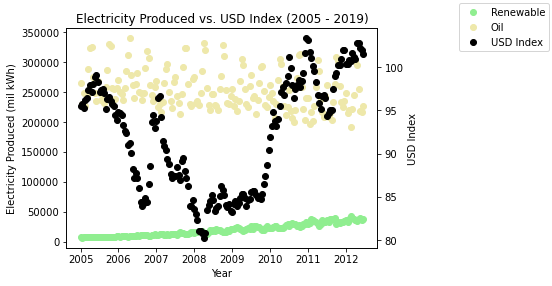

In [270]:
# major ticks for x-axis (by year)
years = np.arange(2005, 2020, 1)
ticks = np.arange(0, len(data["Date"]), 24)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.scatter(data["Date"], data["Total Renewable (mil kWh)"], c="lightgreen", label="Renewable")
ax1.scatter(data["Date"], data["Total Oil (mil kWh)"], c="palegoldenrod", label="Oil")

plt.ylabel("Electricity Produced (mil kWh)")

ax2 = ax1.twinx() 

ax2.set_ylabel("USD Index")
lns3=ax2.scatter(data["Date"], data["USD Index"], c="black", label="USD Index")

plt.xticks(ticks, years, rotation = 45)
fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("USD Index")

plt.xlabel("Years")
plt.title("Electricity Produced vs. USD Index (2005 - 2019)")

plt.tight_layout()

plt.savefig("Plots\Question 6 - Sources vs. USD Index.png", bbox_inches='tight')
